<a href="https://colab.research.google.com/github/avadhut-24/DSA/blob/master/MNIST_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [24]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [25]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [26]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [27]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [28]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3039 - accuracy: 0.9120
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1400 - accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1037 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0838 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0697 - accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0594 - accuracy: 0.9810
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9838
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0479 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0400 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.036

Training data accuracy = 98.79%

In [30]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9727
0.9726999998092651


Test data accuracy = 97.26

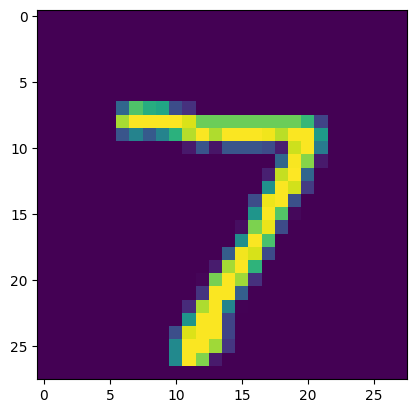

In [31]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [32]:
print(Y_test[0])

7


In [33]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
print(Y_pred.shape)

(10000, 10)


In [35]:
print(Y_pred[0])

[2.2700703e-02 1.1111870e-03 8.8562018e-01 9.9911499e-01 5.5827205e-09
 2.1270147e-02 2.9379756e-11 9.9999881e-01 4.2455265e-01 7.5295498e-03]


In [36]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [37]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

In [20]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [21]:
print(conf_mat)

tf.Tensor(
[[ 966    1    0    0    1    5    2    0    3    2]
 [   0 1117    2    2    0    2    3    0    9    0]
 [   6    0  987   10    7    1    4    6   10    1]
 [   0    0    3  973    1   29    0    2    1    1]
 [   1    0    4    1  963    0    4    0    1    8]
 [   1    0    0    5    3  876    2    1    3    1]
 [   3    2    0    1    1    9  942    0    0    0]
 [   0    3    7    7    2    0    0  995    7    7]
 [   6    0    2    4    6   10    2    3  939    2]
 [   1    2    0    1   10    6    1    8    2  978]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

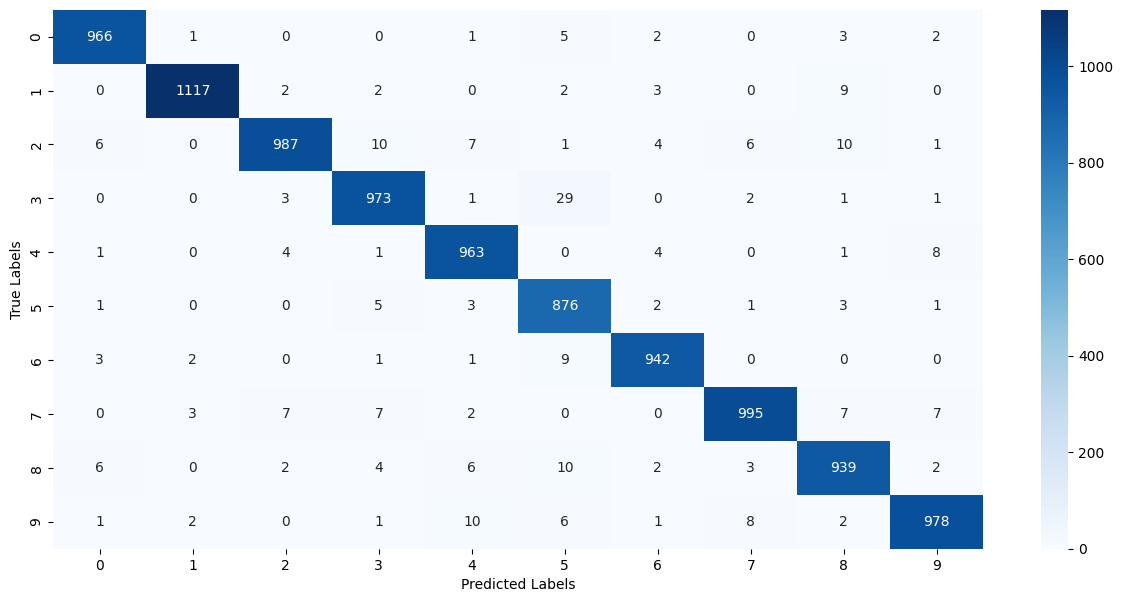

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Predictive system:**

Path of the image to be predicted: /content/image_5.jpeg


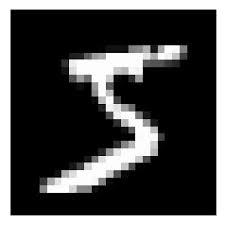

1/1 [==============================] - 0s 22ms/step
The Handwritten Digit is recognised as  7


In [55]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)